# Voronoi Stratified Sampling - Example

- Author: Michael D. Shields
- Date: July 02, 2020

In this example, the stratified sampling method is employed to generate samples from an exponential distribution using Voronoi stratification. The method illustrates various aspects of the UQpy.SampleMethods.VoronoiSTS class.

Import the necessary libraries. Here we import standard libraries such as numpy and matplotlib, but also need to import the VoronoiSTS class from UQpy.SampleMethods.

In [1]:
from UQpy.SampleMethods import VoronoiStrata, VoronoiSTS
from UQpy.Distributions import Exponential
import numpy as np
import matplotlib.pyplot as plt
import time
from scipy.stats import expon
from scipy.spatial import Voronoi, voronoi_plot_2d

Run STS for 25 samples.

- 2 dimensions
- Five strata in each dimension
- Exponential distribution with location parameter = 1 and scale parameter = 1.

Create a distribution object.

In [2]:
marginals = [Exponential(loc=1., scale=1.), Exponential(loc=1., scale=1.)]

## Equal number of samples in each stratum 

Create strata object using VoronoiStrata class.

In [3]:
strata_obj = VoronoiStrata(nseeds=8, dimension=2, random_state=3)

Figure shows the stratification of domain using randomly generated seed points 

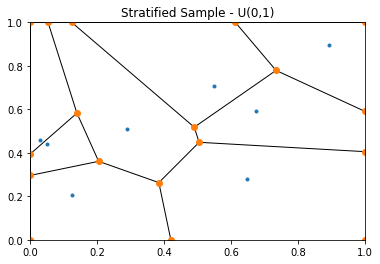

In [4]:
voronoi_plot_2d(strata_obj.voronoi)
plt.title('Stratified Sample - U(0,1)')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.show()

Run stratified sampling

In [5]:
sts_vor_obj = VoronoiSTS(dist_object=marginals, strata_object=strata_obj)
sts_vor_obj.run(nsamples_per_stratum=3)

NameError: name 'np' is not defined

Plot the resulting stratified samples and the boundaries of the strata in the U(0,1) space.

In [ ]:
voronoi_plot_2d(strata_obj.voronoi)
plt.title('Stratified Sample - U(0,1)')
plt.plot(sts_vor_obj.samplesU01[:, 0], sts_vor_obj.samplesU01[:, 1], 'dm')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.show()

In [ ]:
sts_vor_obj.weights

## Proportional Sampling 

VoronoiSTS class can generate samples proportional to volume of each strarum.

In [ ]:
sts_vor_obj1 = VoronoiSTS(dist_object=marginals, strata_object=strata_obj)
sts_vor_obj1.run(nsamples=10)

It can be noticed that new sample in each stratum is proportional to volume

In [ ]:
print('Volume: ', sts_vor_obj1.strata_object.volume)
print('Number of samples in each stratum: ', sts_vor_obj1.nsamples_per_stratum)

In [ ]:
voronoi_plot_2d(strata_obj.voronoi)
plt.title('Stratified Sample - U(0,1)')
plt.plot(sts_vor_obj.samplesU01[:, 0], sts_vor_obj.samplesU01[:, 1], 'dm')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.show()